## Convolutional Neural Networks for Image Processing

### Image Processing With Neural Networks

### Images as data: visualizations

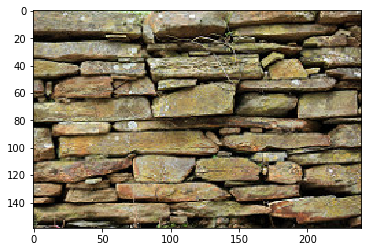

In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('bricks.png')

# Display the image
plt.imshow(data)
plt.show();

### Images as data: changing images

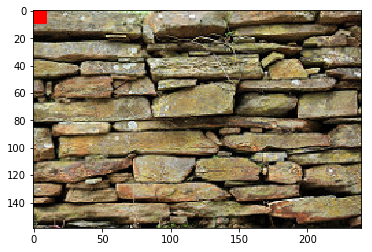

In [3]:
# Set the red channel in this part of the image to 1
data[:10,:10,0] = 1

# Set the green channel in this part of the image to 0
data[:10,:10,1] = 0

# Set the blue channel in this part of the image to 0
data[:10,:10,2] = 0

# Visualize the result
plt.imshow(data)
plt.show();

### Using one-hot encoding to represent images

In [6]:
import numpy as np

In [8]:
labels = np.array(['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress'])

# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

In [9]:
ohe_labels

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

### Evaluating a classifier

In [10]:
predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
# Calculate the number of correct predictions
number_correct = (predictions * test_labels).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct / len(test_labels)
print(proportion_correct)

6.0
0.75


### Build a neural network

In [14]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [15]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [ ]:
arr = np.load('fashion.npz')['arr_0']

In [83]:
test_data = arr.tolist()['test_data']
test_labels = arr.tolist()['test_labels']

train_data = arr.tolist()['train_data']
train_labels = arr.tolist()['train_labels']

In [84]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(50, 784)

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 8ms/step - loss: 1.0793 - acc: 0.3000 - val_loss: 1.0602 - val_acc: 0.3000
Epoch 2/3
40/40 [==============================] - 0s 370us/step - loss: 1.0109 - acc: 0.5500 - val_loss: 1.0023 - val_acc: 0.5000
Epoch 3/3
40/40 [==============================] - 0s 182us/step - loss: 0.9668 - acc: 0.6750 - val_loss: 0.9441 - val_acc: 0.8000


In [85]:
# Reshape test data
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)
# loss and acc

10/10 [==============================] - 0s 150us/step


[0.92448484897613525, 0.80000001192092896]

In [86]:
model.metrics_names

['loss', 'acc']

### Using Convolutions

#### One dimensional convolutions

In [17]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


#### Image convolutions

In [58]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

#### Defining image convolution kernels


In [ ]:
# a kernel that finds horizontal lines in images.
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])

# a kernel that finds a light spot surrounded by dark pixels.
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

# a kernel that finds a dark spot surrounded by bright pixels.
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

A dense layer has one weight for each pixel in the image.

A convolutional layer has only one weight for each pixel **in the kernel**.

#### Convolutional network for image classification

In [93]:
(img_cols, img_rows) = 28,28

In [95]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 3 categories
model.add(Dense(3, activation='softmax'))

#### Training a CNN to classify clothing types

In [97]:
test_data = arr.tolist()['test_data']
test_labels = arr.tolist()['test_labels']

train_data = arr.tolist()['train_data']
train_labels = arr.tolist()['train_labels']

In [99]:
train_data.shape

(50, 28, 28, 1)

In [98]:
# Compile the model 
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, 
          validation_split=.2, 
          epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 7ms/step - loss: 0.9449 - acc: 0.5000 - val_loss: 0.5798 - val_acc: 1.0000
Epoch 2/3
40/40 [==============================] - 0s 755us/step - loss: 0.5844 - acc: 0.9250 - val_loss: 0.3509 - val_acc: 1.0000
Epoch 3/3
40/40 [==============================] - 0s 689us/step - loss: 0.3528 - acc: 0.9750 - val_loss: 0.2872 - val_acc: 1.0000


#### Evaluating a CNN with test data

In [100]:
# Evaluate the model on separate test data
model.evaluate(test_data,test_labels, batch_size=10) # (10 images per batch)
# The first number in the output is the value of the cross-entropy loss, the second is the value of the accuracy.

10/10 [==============================] - 0s 498us/step


[0.33754777908325195, 0.89999997615814209]

#### Add padding to a CNN


In [101]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))
# the output layer will have the same size as the input layer!

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Add strides to a convolutional network

In [102]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 13, 13, 10)        100       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 5073      
Total params: 5,173
Trainable params: 5,173
Non-trainable params: 0
_________________________________________________________________


#### Calculate the size of convolutional layer output

What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?


A: $(256 + 2 * p - f) / s + 1$

> 128

### Going Deeper

#### Creating a deep learning network

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, activation='relu', kernel_size=2, input_shape=(img_rows, img_cols, 1)))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, activation='relu', kernel_size=2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Train a deep CNN to classify clothing images

In [106]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 1s 13ms/step - loss: 1.0642 - acc: 0.5500 - val_loss: 1.0084 - val_acc: 0.9000
Epoch 2/3
40/40 [==============================] - 0s 715us/step - loss: 0.9327 - acc: 0.9500 - val_loss: 0.8370 - val_acc: 1.0000
Epoch 3/3
10/10 [==============================] - 0s 515us/step


[0.80119955539703369, 0.89999997615814209]

In [107]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_5 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


#### How many parameters in a CNN?

How many parameters would a network have if its inputs are images with 28-by-28 pixels, there is one convolutional layer with 10 units kernels of 3-by-3 
pixels, using zero padding (input has the same size as the output), and one densely connected layer with 2 units?

In [109]:
model = Sequential()

# Add a convolutional layer (10 units)
model.add(Conv2D(10, activation='relu', kernel_size=3, input_shape=(img_rows, img_cols, 1), padding='same'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
flatten_7 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 15682     
Total params: 15,782
Trainable params: 15,782
Non-trainable params: 0
_________________________________________________________________


#### How many parameters in a deep CNN?

In [110]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 10)        410       
_________________________________________________________________
flatten_8 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 20283     
Total params: 20,743
Trainable params: 20,743
Non-trainable params: 0
_________________________________________________________________


#### Write your own pooling operation

In [ ]:
# Result placeholder
result = np.zeros((128//2, 128//2))

# Pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

#### Keras pooling layers

In [114]:
from keras.layers import MaxPool2D

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5,2,activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_9 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 2163      
Total params: 2,543
Trainable params: 2,543
Non-trainable params: 0
_________________________________________________________________


#### Train a deep CNN with pooling to classify images

In [115]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit to training data
model.fit(train_data, train_labels, epochs=3, batch_size=10, validation_split=.2)

# Evaluate on test data 
model.evaluate(test_data, test_labels, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 12ms/step - loss: 1.0686 - acc: 0.6250 - val_loss: 1.0354 - val_acc: 0.8000
Epoch 2/3
40/40 [==============================] - 0s 707us/step - loss: 1.0412 - acc: 0.6750 - val_loss: 0.9981 - val_acc: 0.9000
Epoch 3/3
10/10 [==============================] - 0s 363us/step


[1.0094922780990601, 0.60000002384185791]

### Understanding and Improving Deep Convolutional Networks

#### Plot the learning curves

In [121]:
import matplotlib.pyplot as plt

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(4, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(8,kernel_size=3,activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 27, 27, 4)         20        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 8)         296       
_________________________________________________________________
flatten_14 (Flatten)         (None, 968)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 2907      
Total params: 3,223
Trainable params: 3,223
Non-trainable params: 0
_________________________________________________________________


In [124]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=.2, epochs=3, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 11ms/step - loss: 0.7709 - acc: 0.8500 - val_loss: 0.7146 - val_acc: 0.9000
Epoch 2/3
40/40 [==============================] - 0s 891us/step - loss: 0.6602 - acc: 0.9250 - val_loss: 0.5880 - val_acc: 1.0000
Epoch 3/3
40/40 [==============================] - 0s 594us/step - loss: 0.5584 - acc: 0.9500 - val_loss: 0.5123 - val_acc: 1.0000


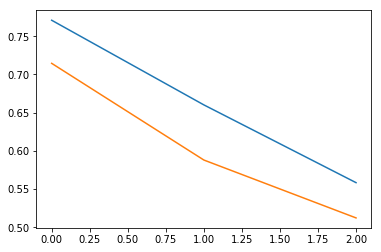

In [125]:
# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])

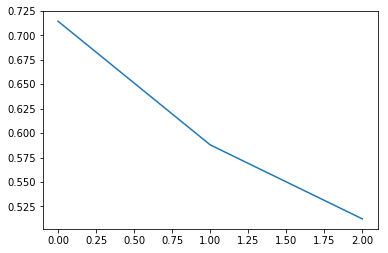

In [126]:
# Plot the validation loss
plt.plot(history['val_loss'])

#### Using stored weights to predict in a test set

In [128]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add another convolutional layer
model.add(Conv2D(15,kernel_size=2,activation='relu'))

# Add a pooling operation
model.add(MaxPool2D(2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 27, 27, 5)         25        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 15)        315       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2535)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 7608      
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
_________________________________________________________________


In [129]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
model.predict(test_data[:3])

array([[ 0.09926841,  0.09344567,  0.8072859 ],
       [ 0.03939046,  0.043042  ,  0.91756755],
       [ 0.23671193,  0.70986897,  0.05341912]], dtype=float32)

#### Adding dropout to your network

In [134]:
from keras.layers import Dropout

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a dropout layer
model.add(Dropout(.2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
dropout_2 (Dropout)          (None, 27, 27, 15)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_18 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 10143     
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


#### Add batch normalization to your network

In [131]:
from keras.layers import BatchNormalization

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 27, 27, 15)        75        
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 15)        60        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_17 (Flatten)         (None, 3380)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 10143     
Total params: 10,583
Trainable params: 10,553
Non-trainable params: 30
_________________________________________________________________


#### Extracting a kernel from a trained network

In [136]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add another convolutional layer
model.add(Conv2D(15,kernel_size=2,activation='relu'))

# Add a pooling operation
model.add(MaxPool2D(2))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 27, 27, 5)         25        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 26, 26, 15)        315       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 15)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 2535)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 7608      
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel = weights1[0][...,0, 0]
print(kernel)

[[ 0.03504268  0.43281329]
 [-0.17416623  0.4680562 ]]


#### Shape of the weights

A Keras neural network stores its layers in a list called model.layers. For the convolutional layers, you can get the weights using the .get_weights() method. This returns a list, and the first item in this list is an array representing the weights of the convolutional kernels. If the shape of this array is (2, 2, 1, 5), what does the first number (2) represent?
> The kernel size is 2 by 2.



#### Visualizing kernel responses

In [143]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)
    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)
    return result

In [145]:
import inspect
lines = inspect.getsource(convolution)
print(lines)

def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)
    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)
    return result



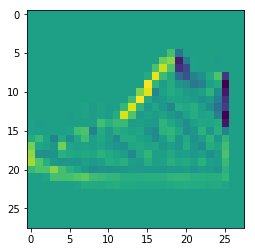

In [144]:
import matplotlib.pyplot as plt

# Convolve with the fourth image in test_data
out = convolution(test_data[3, :, :, 0], kernel)

# Visualize the result
plt.imshow(out)

plt.show()

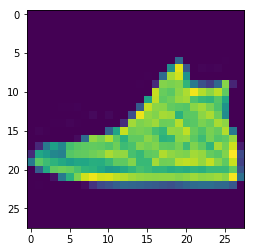

In [141]:
plt.imshow(test_data[3, :, :, 0])

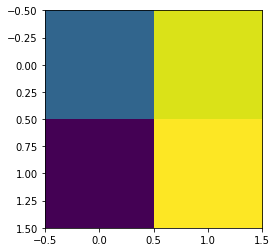

In [142]:
plt.imshow(kernel)